## Project 1.3 - Results and Comparison

Group: Emmy Noether

Students: Janik Rausch (628334), Camilo Tello Breuer (633291), Ida Wöstheinreich (628428)

In [1]:
using LinearAlgebra,Random,Printf,FFTW,JLD,Plots,LaTeXStrings,Colors
include("Ground_state.jl"); include("Evolution.jl")

simulate_2D (generic function with 1 method)

**1D Evolution**

Energy expectation: 23.571088142899164
Potential barrier: 2.5

┌ Info: Saved animation to c:\Users\camil\Documents\Studium\Master\Module\Computational Physics\Project 1\CPII_Emmy_Noether\Project2\CPII_Emmy_Noether\Project2\strang-splitting.gif
└ @ Plots C:\Users\camil\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\camil\\Documents\\Studium\\Master\\Module\\Computational Physics\\Project 1\\CPII_Emmy_Noether\\Project2\\CPII_Emmy_Noether\\Project2\\strang-splitting.gif")
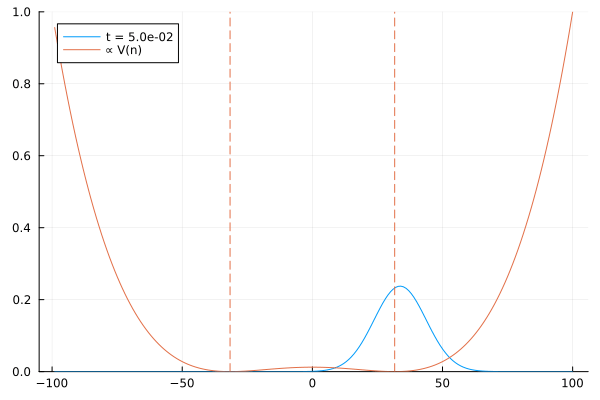

In [4]:
N = 200
T, τ = 20, 0.05
μ, ϵ = 20, sqrt(0.001)

fps = 20; gif_length = 10

m, k = (1/ϵ,), (1,)
σ = 10

ψ_0 = wave_packet(lattice(N, 1), m, σ, k)
println("Energy expectation: ", energy_expectation(ψ_0, μ, ϵ)[1])
println("Potential barrier: ", μ/8)

#simulate_1D(N, μ, ϵ, T, τ, ψ_0, "euler", fps, gif_length)
#simulate_1D(N, μ, ϵ, T, τ, ψ_0, "crank-nicolson", fps, gif_length)
simulate_1D(N, μ, ϵ, T, τ, ψ_0, "strang-splitting", fps, gif_length)

**2D Evolution**

┌ Info: Saved animation to c:\Users\camil\Documents\Studium\Master\Module\Computational Physics\Project 1\CPII_Emmy_Noether\Project2\CPII_Emmy_Noether\Project2\strang-splitting_2D.gif
└ @ Plots C:\Users\camil\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\camil\\Documents\\Studium\\Master\\Module\\Computational Physics\\Project 1\\CPII_Emmy_Noether\\Project2\\CPII_Emmy_Noether\\Project2\\strang-splitting_2D.gif")
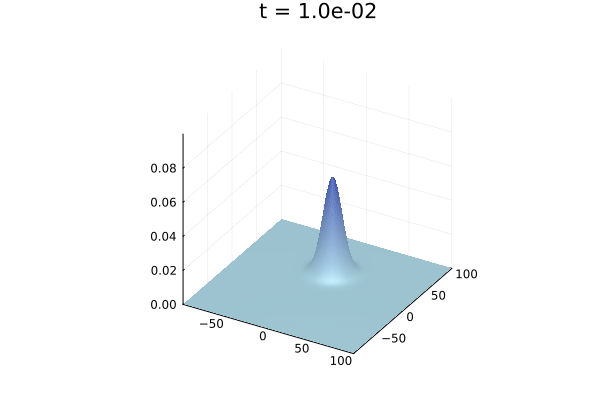

In [4]:
N = 200
T, τ = 20, 0.01
μ, ϵ = 20, sqrt(0.001)

fps = 20; gif_length = 10

m, k = (1/ϵ,0), (1,0) #cool animation: (1/ϵ,0), (1,0)
σ = 10

ψ_0 = wave_packet(lattice(N, 2), m, σ, k)

#simulate_2D(N, μ, ϵ, T, τ, ψ_0, "euler", fps, gif_length)
#simulate_2D(N, μ, ϵ, T, τ, ψ_0, "crank-nicolson", fps, gif_length)
simulate_2D(N, μ, ϵ, T, τ, ψ_0, "strang-splitting", fps, gif_length)

**Comparison (1D)**

In [5]:
function test_equivalence(N, μ, ϵ, T, τ, ψ_0, fps, gif_length)
    @assert(T > 0, "T = " * string(T) * " must be positive")
    @assert(fps > 0, "fps = " * string(fps) * " must be positive")
    @assert(gif_length > 0, "gif_length = " * string(gif_length) * " must be positive")
    
    n = lattice(N, 1); V = potential(μ, ϵ, n)
    ψ_e, ψ_cn, ψ_ss = copy(ψ_0), copy(ψ_0), copy(ψ_0)
    t = 0

    P = plan_fft(ψ_0); P_inv = inv(P)
    
    anim = @animate while t < T
        ψ_e = euler(μ, ϵ, ψ_e, V, τ)
        ψ_cn = crank_nicolson(μ, ϵ, ψ_cn, V, τ, 1e-10, 10000) #pass tol/maxiters as kwargs?
        ψ_ss = strang_splitting(μ, ϵ, ψ_ss, V, τ, P, P_inv)
        t += τ
        fmt = Printf.Format("t = %.1e")
        plot(n, abs.(ψ_e), color = RGB(0, 0.75, 1.0), label = "Euler")
        plot!(n, abs.(ψ_cn), color = RGB(0.3, 0.375, 0.9), label = "Crank-Nicolson")
        plot!(n, abs.(ψ_ss), color = RGB(0.6, 0, 0.8), label = "Strang-Splitting")
        ylims!(0, 1)
        plot!(n, V/max(V...), color = 2, label = "∝ V(n)")
        vline!([-1/ϵ, 1/ϵ], color = 2, label = "", linestyle = :dash)
        title!(Printf.format(fmt, t))
    end every round(Int, 1/(gif_length*fps) * T/τ)

    gif(anim, "Comparison.gif", fps = fps)
end

test_equivalence (generic function with 1 method)

┌ Info: Saved animation to c:\Users\camil\Documents\Studium\Master\Module\Computational Physics\Project 1\CPII_Emmy_Noether\Project2\CPII_Emmy_Noether\Project2\Comparison.gif
└ @ Plots C:\Users\camil\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\camil\\Documents\\Studium\\Master\\Module\\Computational Physics\\Project 1\\CPII_Emmy_Noether\\Project2\\CPII_Emmy_Noether\\Project2\\Comparison.gif")
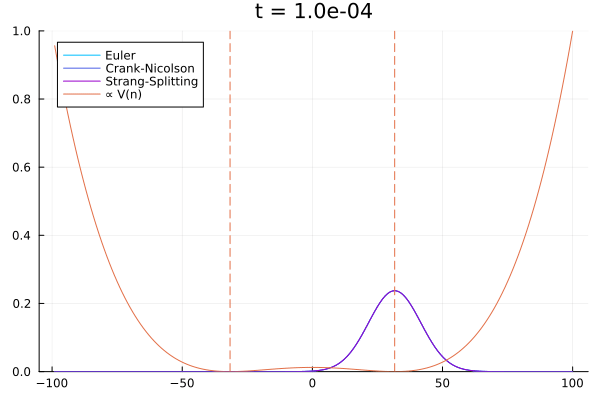

In [6]:
N = 200
T, τ = 5, 0.0001
μ, ϵ = 20, sqrt(0.001)

fps = 20; gif_length = 10

m, k = (1/ϵ,), (1,)
σ = 10
ψ_0 = wave_packet(lattice(N, 1), m, σ, k)

test_equivalence(N, μ, ϵ, T, τ, ψ_0, fps, gif_length)

**Infinitesimal time limit ($\hat{\tau} \to 0$)**

In [7]:
N = 200
μ = 20.
ϵ = sqrt(0.001)
T = 5

m, k = (1/ϵ,), (1,)
σ = 10
V = potential(μ, ϵ, lattice(N, 1))
τ = range(0.1, 0.0001, 50)

anim = @animate for j ∈ τ
    ψ_Ep = wave_packet(lattice(N, 1), m, σ, k)
    ψ_CNp = wave_packet(lattice(N, 1), m, σ, k)
    
    for i in 1:Int(round(T/j))
        ψ_E = euler(μ, ϵ, ψ_Ep, V, i)
        ψ_CN = crank_nicolson(μ, ϵ, ψ_CNp, V, i, 1e-3, 3000)
        ψ_Ep = ψ_E
        ψ_CNp = ψ_CN
    end
    p = plot(lattice(N, 1), abs.(ψ_Ep).^2, label = "Crank-Nicolson",legend=:topleft)
    plot!(lattice(N, 1), abs.(ψ_CNp).^2, label = "Euler")
    title!("τ="*string(round(j,digits = 5))*", T="*string(T))
    ylims!(0,0.1)
end

gif(anim, "cool_limit.gif", fps = 5)